# Unit 2: Open Food dataset 
###### Candelaria Retamal
###### **10.02.2022**

## Table of contents

<a id="Table"></a>
### [A. An overview of the dataset](#Overview)

### [B. Preliminary Exploratory Data Analysis](#Preliminary)

### [C. In-depth Exploratory Data Analysis](#Indepth)

### [D. Text data](#Text)

### [E. Time-series data](#Timeseries)

### [F. Correlation analysis](#Correlation)

<a id="Overview"></a>
### **A. An overview of the dataset**

We provide the data as a compressed pickle file. We recommend loading it using the pandas read_pickle function and setting the compression parameter to ‘zip’. For more information on the read_pickle function, please check the online|m

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.datasets import fetch_openml

%load_ext lab_black
%matplotlib inline

#### A1. Import the data as a pandas DataFrame into your notebook.
We use the read_pickle function as suggested, incorporating compression=zip

In [2]:
df = pd.read_pickle("data_385k.pkl", compression="zip")

#### A2. Check the number of rows and columns. You should have 385’384 samples and 99 columns.

In [3]:
# Number of rows
print(df.shape[0])
# Number of columns
print(df.shape[1])

385384
99


#### A3. Display a few entries from the DataFrame.


In [4]:
df.head(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
385379,0.0,7640145040283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385380,0.0,7640147023628,850.0,mg,48.6,9.72,g,NaN,NaN,NaN,...,45.0,mg,10.5,mg,500.0,mg,NaN,NaN,37.5,mg
385381,0.0,3046920021593,NaN,NaN,22.0,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385382,0.0,4044889004335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385383,0.0,7613379866622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### A4. Check the data type for each column. Create separate lists to hold the names of columns of the same data type.

For checking the type of each column we first make a quick chek in the Dtype of each column that conformas the DataFrame

In [6]:
# The command dtypes will be used for checking the data type in every column
df.dtypes

alcohol_by_volume                                  float64
barcode                                             object
calcium_per_hundred                                float64
calcium_unit                                        object
carbohydrates_per_hundred                          float64
                                                    ...   
vitamin_c_ascorbic_acid_unit                        object
vitamin_d_d2_d3_international_units_per_hundred    float64
vitamin_d_d2_d3_international_units_unit            object
zinc_per_hundred                                   float64
zinc_unit                                           object
Length: 99, dtype: object

In [7]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    50
object     48
int64       1
dtype: int64

In [8]:
# For creating separate lists to hold the names of the columns with the same dtype:
float64_type = df.select_dtypes(include=[np.float64]).columns.values.tolist()
object_type = df.select_dtypes(include=[np.object]).columns.values.tolist()
int64_type = df.select_dtypes(include=[np.int64]).columns.values.tolist()

##### [Return to the table of contents](#Table)

<a id="Preliminary"></a>
### **B. Preliminary Exploratory Data Analysis**
The goal is to get familiar with the strengths and weaknesses of the dataset. For preparing the dataset for the in-depth analysis

#### B1. Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?

For responding to the first question, we may check the existance of any duplicated products in the list. As the dataframe is big we will ask for the sum of duplicated data.

In [9]:
print("There are a total of " + str(df.duplicated().sum()) + " duplicated products")

There are a total of 10500 duplicated products


In [10]:
# Remove the duplicated products from the dataset
df.drop_duplicates(inplace=True)
# Finally, we check the new shape of the dataset
df.shape

(374884, 99)

The new dataset has exactly **10500** rows less than the original dataset. Hence the total amount of duplicated products were removed from the DF

#### B2. Show the proportion of missing values in the data using appropriate visualizations and numerical summaries

We will start by showing the proportion of missing values using visualizations. For accomplishing this task we will take a look at the missing values per sample.

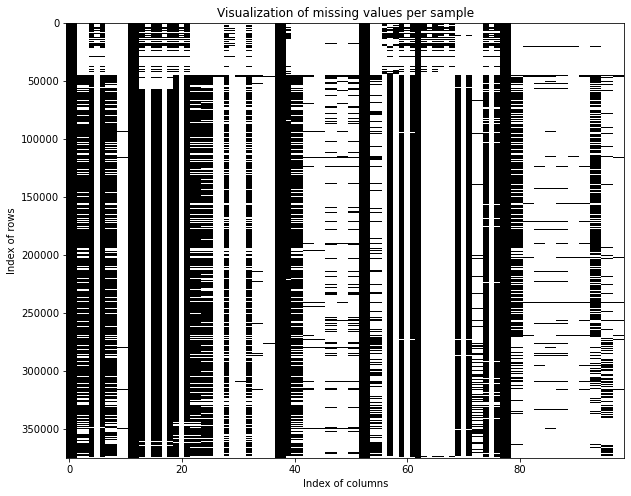

In [11]:
# This is a representation of the occupation of cells in the dataset.
plt.figure(figsize=(10, 8))
plt.title("Visualization of missing values per sample")
plt.xlabel("Index of columns")
plt.ylabel("Index of rows")
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

Apparently, the first columns seem to have more information than the last ones. For having a clearer mapping of the situation we will now incorporate a final visual mapping based on each available feature:

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

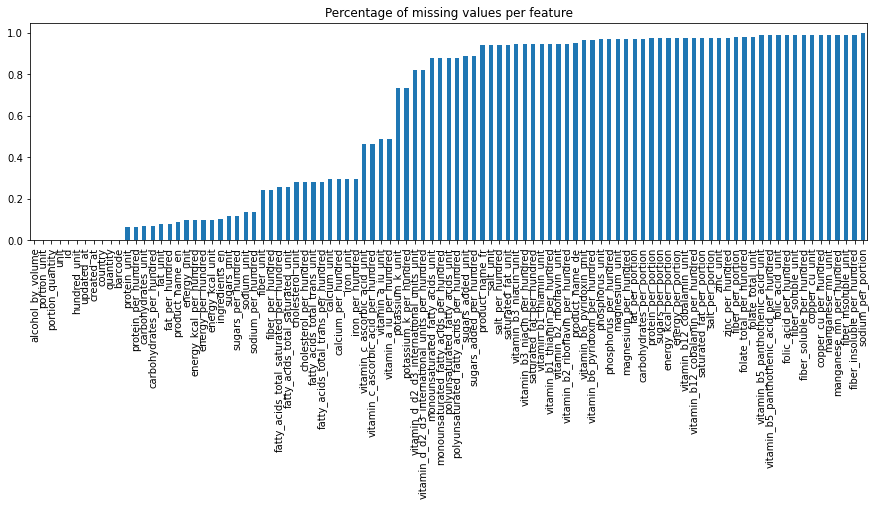

In [12]:
# If we check the % of missing information per feature
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature"
)

According to this last visualization map, most of the features have more than an 80% of missing values. Depending on the nature of the missing data we will be able to know how robust is the dataset. Still, this amount of missing data may be an indicator of an urgent need of removing a large amount of incomplete samples that may not be filled with relevant data.

For the nummerical summaries we will first check the existance of unique values. This process will give us some insights about the number of binary, ordinal and continuous features in the dataset.

In [13]:
# First we check the columns which dtype is numeric
unique_numeric = df.select_dtypes(include="number").nunique().sort_values()
np.sum(np.array(unique_numeric) == 1)

0

In [14]:
# Now we check the columns with an object dtype
unique_obj = df.select_dtypes(include="object").nunique()
np.sum(np.array(unique_obj) == 1)

37

While for the numerical columns, no binary attributes were found; within the object columns, at least 37 attributes seem to have a unique available value. This may indicate that these columns can be easily filled with the same value that all of the rest of the rows have for that column. Additionally, this columns do not provide much information to the analysis. *It is important to note that all of these attributes correspond to a property that contains the name unit.*

It may also be interesting to see how many columns may be found in different proportion intervals of missing information. This will give us a clear idea of the percentage of columns that do not have enough information in the dataset

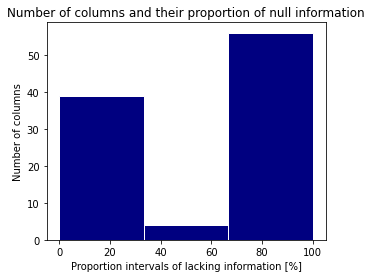

In [15]:
# % of null information in the columns
null_percentage = df.isnull().sum() / df.shape[0] * 100

hist = null_percentage.plot.hist(
    bins=3, color="navy", edgecolor="white", range=[0, 100], figsize=(5, 4)
)
hist.set_xlabel("Proportion intervals of lacking information [%]")
hist.set_ylabel("Number of columns")
hist.set_title("Number of columns and their proportion of null information")
plt.show()

Approximately, a 55% of the columns lack at least an 70% of their information. This is information that will be difficult to fill with other values because we have already seen that no many attributes present binary information. In most cases, the information contained in the columns may be found in a large range of numerical options.

Finally, we will check if there is any relationship between the amount of missing information and the nature (Type) of the data contained in each interval of the plot. For this we create a dataframe that contains the proportion of lacking information and the type of the columns saved as a string attribute

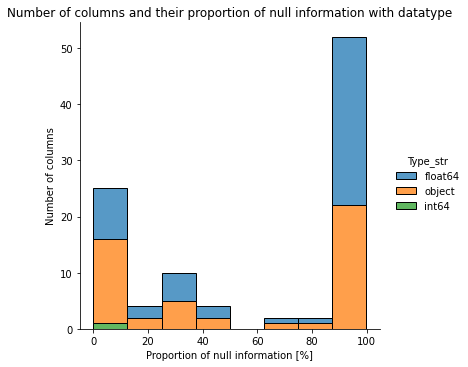

In [16]:
# For ploting a histogram with hue = datatype
# Create auxliary data frame in pandas
aux_plot = pd.DataFrame()
aux_plot["Null_val"] = null_percentage
aux_plot["Type_str"] = df.dtypes.astype("string")

# Plot the histogram including a hue that represents the dtype
p = sns.displot(
    data=aux_plot, x="Null_val", hue="Type_str", palette="tab10", multiple="stack"
)
p.set(
    xlabel="Proportion of null information [%]",
    ylabel="Number of columns",
    title="Number of columns and their proportion of null information with datatype",
)

The plotted histogram shows that the columns that are missing information are mainly numerical, while the complete columns are more likely to be of object type.

**Observations** In summary, through this lines we have reviewed the amount of non null information within the DataFrame, considering different levels of completeness. As the only rows  that have been extracted so far are the repetead ones, we still have a lot of missing information. It is relevant to aknowledge that there are 37 unique value variables within the object type columns (named as unit), which are good candidates for future filling of all the rows. In total a 55% of the columns, are missing an 80% or more of the total information contained in rows. Finally, there exists more missing information of type float, than missing information of type object.

#### B3. Now that you know the extent of missing values in the data, you should address them. Your goal is to keep as much data as possible in your DataFrame. What is the shape of the remaining data?

As a first step, all of the information that only contains one option of value (in the object type), will be replaced by the only value that it may acquire. In other words, the 37 candidates will be filled in all of their rows with the only possible value of the column.

In [17]:
# We fill the NaN values of the columns saved in unique. For filling this columns, there is an only value that may be incorporated (as it was previously stated)
unique = []
for x in range(0, len(unique_obj)):
    if unique_obj[x] == 1:
        unique.append(unique_obj.index[x])
for x in unique:
    df[str(x)].fillna(value=df[str(x)].bfill(), inplace=True)
    df[str(x)].fillna(value=df[str(x)].ffill(), inplace=True)

If we take a quick look to the histogram that compares the number of columns and their proportion of lacking information

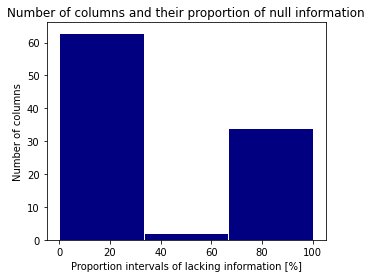

In [18]:
# % of null information in the columns
null_percentage = df.isnull().sum() / df.shape[0] * 100

hist = null_percentage.plot.hist(
    bins=3, color="navy", edgecolor="white", range=[0, 100], figsize=(5, 4)
)
hist.set_xlabel("Proportion intervals of lacking information [%]")
hist.set_ylabel("Number of columns")
hist.set_title("Number of columns and their proportion of null information")
plt.show()

We can see that the number of columns that lack of more than a 70% of the information has decreased from a 55% to a 35% thanks to the filling of the nan values in the object type unique columns.

As a second step, we will only maintain those columns that count with more than a 40% of information. The rest of the columns will be dropped.

In [19]:
# We recalculate the null percentage:
null_percentage = df.isnull().sum() / df.shape[0] * 100
more_70 = []
for x in range(0, len(null_percentage)):
    if null_percentage[x] >= 40:
        df.drop([null_percentage.index[x]], axis=1, inplace=True)

As we did before dropping the values and filling the columns, we will now check the number of columns and their proportion of null information in the cleaned DF.

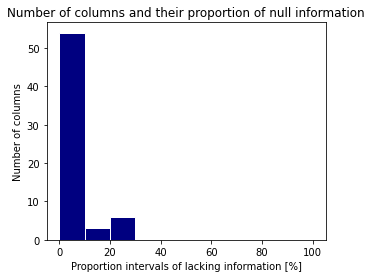

In [20]:
null_percentage = df.isnull().sum() / df.shape[0] * 100
hist = null_percentage.plot.hist(
    bins=10, color="navy", edgecolor="white", range=[0, 100], figsize=(5, 4)
)
hist.set_xlabel("Proportion intervals of lacking information [%]")
hist.set_ylabel("Number of columns")
hist.set_title("Number of columns and their proportion of null information")
plt.show()

If we check again the representation of the occupation of cells in the dataset we will see that it should be much fuller than the fisrt time we visualized

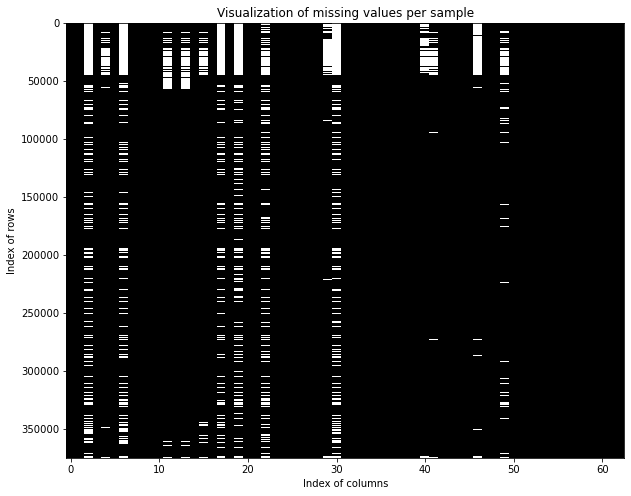

In [21]:
# This is a representation of the occupation of cells in the dataset.
plt.figure(figsize=(10, 8))
plt.title("Visualization of missing values per sample")
plt.xlabel("Index of columns")
plt.ylabel("Index of rows")
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

We will check if there is any relationship between the columns that lack the biggest amount of information and any other column that could be related. As we know that numeric columns lack more information than object type colums, we will a look at the columns containing the string sugar. How many numeric and object columns of each nutrient can there be found in the DB?

In [22]:
# Select columns that contains the string 'sugar'
sugar_cols = [col for col in df.columns if "sugar" in col]
sugars = df[sugar_cols]
sugars.head(5)

,sugars_added_unit,sugars_per_hundred,sugars_unit
0,g,NaN,g
1,g,1.50,g
2,g,0.25,g
3,g,65.80,g
4,g,29.00,g


We may see that the only numeric value is sugars_per_hundred, then the other two columns are not usefull for filling the missing data. Hence, the numeric information that is missing may not be completed through other related columns.

Finally we will compute the new shape of the data

In [23]:
# Number of rows
print(df.shape[0])
# Number of columns
print(df.shape[1])

374884
63


**Observations** Through this section the 37 columns with unique values were filled in all of their rows. Additionally, all of the columns with less than a 40% of completeness (information in rows) were dropped. By plotting the visualization of the missing values we may see that the DF is now much fuller. Finally, we checked if there was any possibility of filling numerical columns of nutrients with the help of another numerical related column. We confirm that this is not possible by checking the nutrient sugars. Therefore, we can extrapolate this behaviour to all the other nutrients.

#### B4. Let’s continue exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

The number of unique values in categorical variables may be computed as:

In [24]:
# Now we check the columns with an object dtype
object_type = df.select_dtypes(include="object").nunique()
unique_objects = []
for x in range(0, len(object_type)):
    if object_type[x] == 1:
        unique_objects.append(object_type.index[x])

In [25]:
print(
    "Within the categorical variables "
    + str(len(unique_objects))
    + " out of a total of "
    + str(len(object_type))
    + " columns contain unique values"
)

Within the categorical variables 37 out of a total of 46 columns contain unique values


In the following task the proportion of samples in each categorical level in the variables country and unit will be shown using appropriate visualizations

Text(0.5, 1.0, 'Proportion of samples in each level for the variable unit')

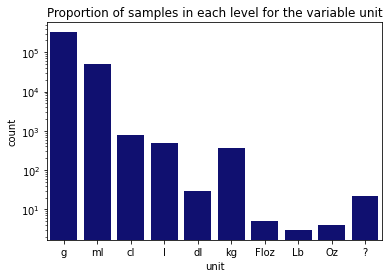

In [26]:
sns.countplot(x="unit", data=df, log=True, color="navy")
plt.title("Proportion of samples in each level for the variable unit")

Text(0.5, 1.0, 'Proportion of samples in each level for the variable country')

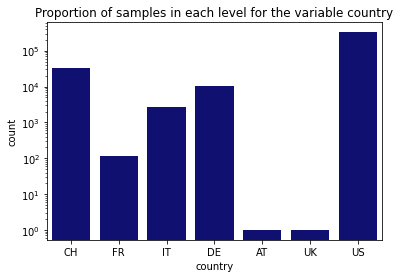

In [27]:
sns.countplot(x="country", data=df, log=True, color="navy")
plt.title("Proportion of samples in each level for the variable country")

In [28]:
filter_country = df["country"] == "AT"
df_keep = df.loc[filter_country, "country"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the information of AT  the new shape is " + str(df.shape))

filter_country = df["country"] == "UK"
df_keep = df.loc[filter_country, "country"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the information of UK the new shape is " + str(df.shape))

After eliminating the information of AT  the new shape is (374883, 63)
After eliminating the information of UK the new shape is (374882, 63)


**Observations** By checking the categorical variables we may see that 37 out of 46 columns have unique values. Also the information contained in the unit columns show that most of the attributes are presented in terms of grams and liters. Finally, we see that USA and Switzerland have much more information (entries) than Germany, Italy and France. Austria and UK will not be considered. The rows that contain information related to these countries were dropped.

#### B5. Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

In the following task we will provide descriptive statistics of the numerical variables

In [29]:
# Using the following commmand the required information is computed
df.describe().loc[["mean", "min", "max"]].T

,mean,min,max
alcohol_by_volume,0.027911,0.0,57.90
calcium_per_hundred,116.647405,0.0,684000.00
carbohydrates_per_hundred,34.005315,0.0,6400.00
cholesterol_per_hundred,58.981358,0.0,250000.00
energy_kcal_per_hundred,272.485548,0.0,39600.00
energy_per_hundred,1139.518310,0.0,165686.40
fat_per_hundred,12.705415,0.0,3200.00
fatty_acids_total_saturated_per_hundred,4.943331,0.0,1000.00
fatty_acids_total_trans_per_hundred,0.034861,0.0,615.38
fiber_per_hundred,2.925632,0.0,1730.00


Also, informative plots of the numerical variables are included

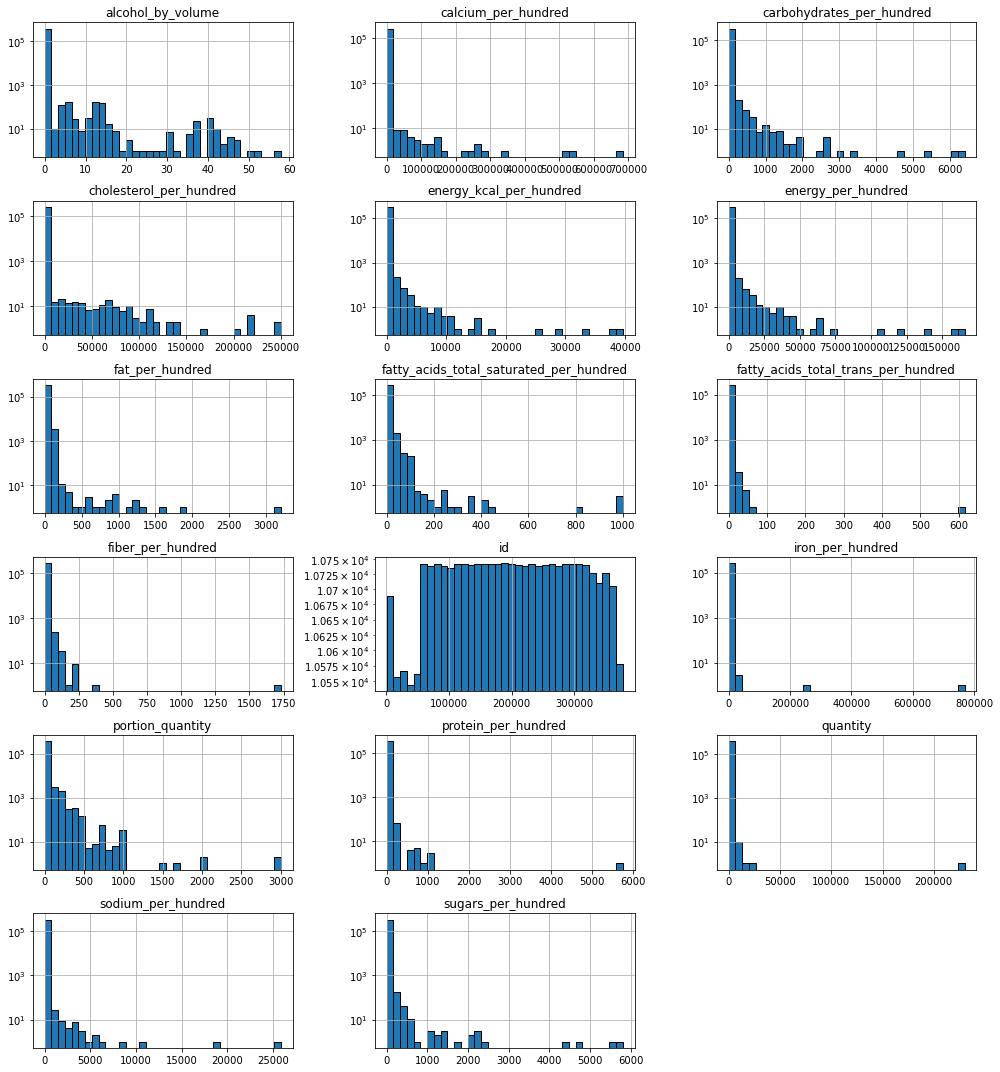

In [30]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=35, figsize=(14, 15), layout=(-1, 3), edgecolor="black", log=True)
plt.tight_layout()

**Observations** From the descriptive statistics we may see that mean values are very distant from maximum values in almost every numeric attribute. This is consistent with the positive skewness that we see in almost all of the descriptive subplots. Also, there are attributes like alcohol, and saturated fatty acids, which have very small mean values. This could be explained if many products had zero values for these nutrients. We will pay special attention to those plots that show attributes mostly contained in a single column, these values may contain relevant outliers that we will need to extract in the future.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

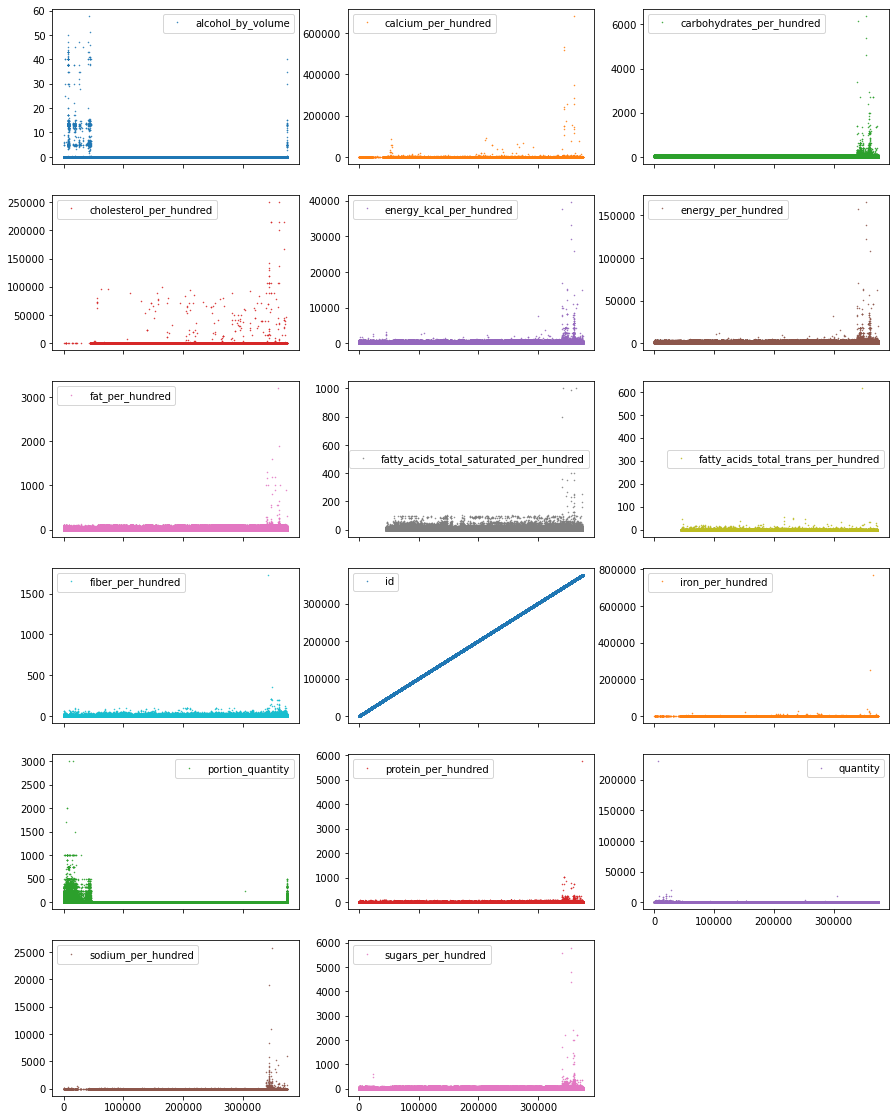

In [31]:
# Take a further look at possible outliers
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(15, 20), markersize=1)

**Observations** From these plots we may see more clearly the outliers that were mentioned in the last observation. Among the last rows there seems to be a set of outliers for some of the nutrients.

#### B6. Address any unrealistic values or errors. The statistics and your plots of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.) can help you spot these values. Afterwards re-do the descriptive statistics and plots to check everything is ok now. Below are some additional tips and hints.
* **The range of acceptable values in each column depends on the unit of each column. You can find the unit of each column in the associated unit column. For example, the protein_per_hundred column unit is found in the protein_unit column, etc.**
* **The unit of the protein_per_hundred column is g, which means that the values in this column should range between 0 and 100. If a column’s unit is mg, then the values should range between 0 and 100000.**
* **If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on this Wikipedia page to define an upper threshold value.**

We start by creating the new DF for holding the columns with the per_hundred suffix in their names

In [32]:
# Select columns that contains the string 'per_hundred'
per_hundred_cols = [col for col in df.columns if "per_hundred" in col]
per_hundred = df[per_hundred_cols]

In [33]:
# List that contains the names of the columns "per_hundred"
numeric_info = per_hundred.columns.values.tolist()

For holding the information related to the unit, the minimum and maximum value ranges, and the corresponding numerical or "per_hundred" column that the unit column is related to we will now create a new dataframe called summary. As its name suggests it contains a summary of the information that must be considered according to the question.

In [34]:
per_unit_cols = [col for col in df.columns if "unit" in col]
per_unit = df[per_unit_cols]
summary = pd.DataFrame(per_unit.iloc[1, :])
summary.columns = ["Unit"]

In [35]:
## I must define the suggested equivalencies for mg, g, IU, etc..
def my_func(lista, col_position):
    range_values = []
    for x in range(0, len(lista)):
        if lista.iloc[x, col_position] == "mg":
            range_values.append(100000)
        elif lista.iloc[x, col_position] == "g":
            range_values.append(100)
        elif lista.iloc[x, col_position] == "µg":
            range_values.append(100000000)
        elif lista.iloc[x, col_position] == "kJ":
            range_values.append(3700)
        elif lista.iloc[x, col_position] == "kCal":
            range_values.append(3700 / 4.184)
        elif (
            lista.iloc[x, col_position] == "IU"
            and lista.index[x] == "vitamin_a_iu_unit"
        ):
            range_values.append(3.333 * 10 ** 8)
        elif (
            lista.iloc[x, col_position] == "IU"
            and lista.index[x] == "vitamin_d_d2_d3_international_units_unit"
        ):
            range_values.append(0.4 * 10 ** 9)
    return range_values

In [36]:
summary["Minimum"] = 0
summary["Maximum"] = my_func(summary, 0)

In [37]:
## Function for creating a new column that will let us find the columns name in the original numerical DF
def transform(s):
    s = s.str.replace("_units?", "_per_hundred", regex=True)
    return s


## List add this column to the dataframe that contains the ranges
summary["Finding name"] = transform(summary.index)

In [38]:
# Only maintain unit data that is related to the numeric _per_hundred
summary = summary[summary["Finding name"].isin(numeric_info)]
summary

,Unit,Minimum,Maximum,Finding name
calcium_unit,mg,0,100000.000000,calcium_per_hundred
carbohydrates_unit,g,0,100.000000,carbohydrates_per_hundred
cholesterol_unit,mg,0,100000.000000,cholesterol_per_hundred
energy_kcal_unit,kCal,0,884.321224,energy_kcal_per_hundred
energy_unit,kJ,0,3700.000000,energy_per_hundred
fat_unit,g,0,100.000000,fat_per_hundred
fatty_acids_total_saturated_unit,g,0,100.000000,fatty_acids_total_saturated_per_hundred
fatty_acids_total_trans_unit,g,0,100.000000,fatty_acids_total_trans_per_hundred
fiber_unit,g,0,100.000000,fiber_per_hundred
iron_unit,mg,0,100000.000000,iron_per_hundred


We will now make a series of plots for showing the dispersion of every numerical attribute. For this purpose the numerical values will be grouped according to their corresponding unit of measurement. Additionally, the maximum value will be plotted for having an idea of the possible outliers that will be henceforth removed.

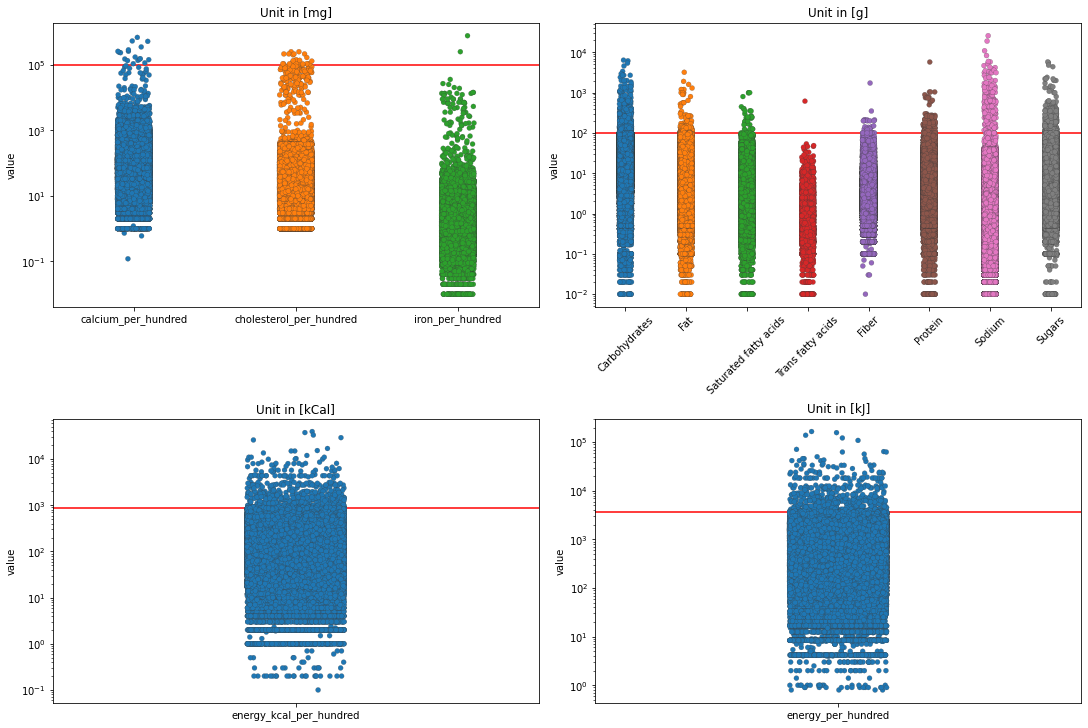

In [39]:
# Generate the attributes of the subplot figure
xlabels = [
    "Carbohydrates",
    "Fat",
    "Saturated fatty acids",
    "Trans fatty acids",
    "Fiber",
    "Protein",
    "Sodium",
    "Sugars",
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)
# x = df[summary[summary["Unit"] == "mg"]["Finding name"]]
sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "mg"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[0, 0],
)
axes[0, 0].axhline(summary[summary["Unit"] == "mg"]["Maximum"][0], color="red")
axes[0, 0].set_title("Unit in [mg]")
axes[0, 0].set_xlabel("")
axes[0, 0].set_yscale("log")


sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "g"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[0, 1],
)
axes[0, 1].axhline(summary[summary["Unit"] == "g"]["Maximum"][0], color="red")
axes[0, 1].set_title("Unit in [g]")
axes[0, 1].set_xlabel("")
axes[0, 1].set_yscale("log")
axes[0, 1].set_xticklabels(xlabels)
axes[0, 1].xaxis.set_tick_params(rotation=45)

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "kCal"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[1, 0],
)
axes[1, 0].axhline(summary[summary["Unit"] == "kCal"]["Maximum"][0], color="red")
axes[1, 0].set_title("Unit in [kCal]")
axes[1, 0].set_xlabel("")
axes[1, 0].set_yscale("log")

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "kJ"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[1, 1],
)
axes[1, 1].axhline(summary[summary["Unit"] == "kJ"]["Maximum"][0], color="red")
axes[1, 1].set_title("Unit in [kJ]")
axes[1, 1].set_xlabel("")
axes[1, 1].set_yscale("log")

**Observations** From the plots we may see that all of the per_hundred values present a set of outliers that overpass the possible value. Note that each subplot contains a different unit, hence maximums are different in the different subplots.

In [40]:
## We will create an auxiliary DF for every unit
# In the DF the columns with the same unit are contained
unit_mg = pd.DataFrame()
for i in range(0, len(summary)):
    if summary["Unit"][i] == "mg":
        unit_mg[summary["Finding name"][i]] = per_hundred.filter(
            regex=summary["Finding name"][i]
        )

# We finally removed the rows onf information in the original DF that were over the proposed filter
mg = unit_mg.columns.values.tolist()
for x in range(0, len(mg)):
    filter_mg = df[mg[x]] > 100000
    df_keep = df.loc[filter_mg, mg[x]]
    df = df.drop(df_keep.index, axis=0)

# This procedure is repeated for every unit

unit_g = pd.DataFrame()
for i in range(0, len(summary)):
    if summary["Unit"][i] == "g":
        unit_g[summary["Finding name"][i]] = per_hundred.filter(
            regex=summary["Finding name"][i]
        )

g = unit_g.columns.values.tolist()
for x in range(0, len(g)):
    filter_g = df[g[x]] > 100
    df_keep = df.loc[filter_g, g[x]]
    df = df.drop(df_keep.index, axis=0)

unit_kCal = pd.DataFrame()
for i in range(0, len(summary)):
    if summary["Unit"][i] == "kCal":
        unit_kCal[summary["Finding name"][i]] = per_hundred.filter(
            regex=summary["Finding name"][i]
        )

kcal = unit_kCal.columns.values.tolist()
for x in range(0, len(kcal)):
    filter_kcal = df[kcal[x]] > 3700 / 4.184
    df_keep = df.loc[filter_kcal, kcal[x]]
    df = df.drop(df_keep.index, axis=0)

unit_kJ = pd.DataFrame()
for i in range(0, len(summary)):
    if summary["Unit"][i] == "kJ":
        unit_kJ[summary["Finding name"][i]] = per_hundred.filter(
            regex=summary["Finding name"][i]
        )

kj = unit_kJ.columns.values.tolist()
for x in range(0, len(kj)):
    filter_kj = df[kj[x]] > 3700
    df_keep = df.loc[filter_kj, kj[x]]
    df = df.drop(df_keep.index, axis=0)

The rows that contained information over the red line have been removed. Now we will remake the subplots for seeing if the information has been correctly removed from the original DF

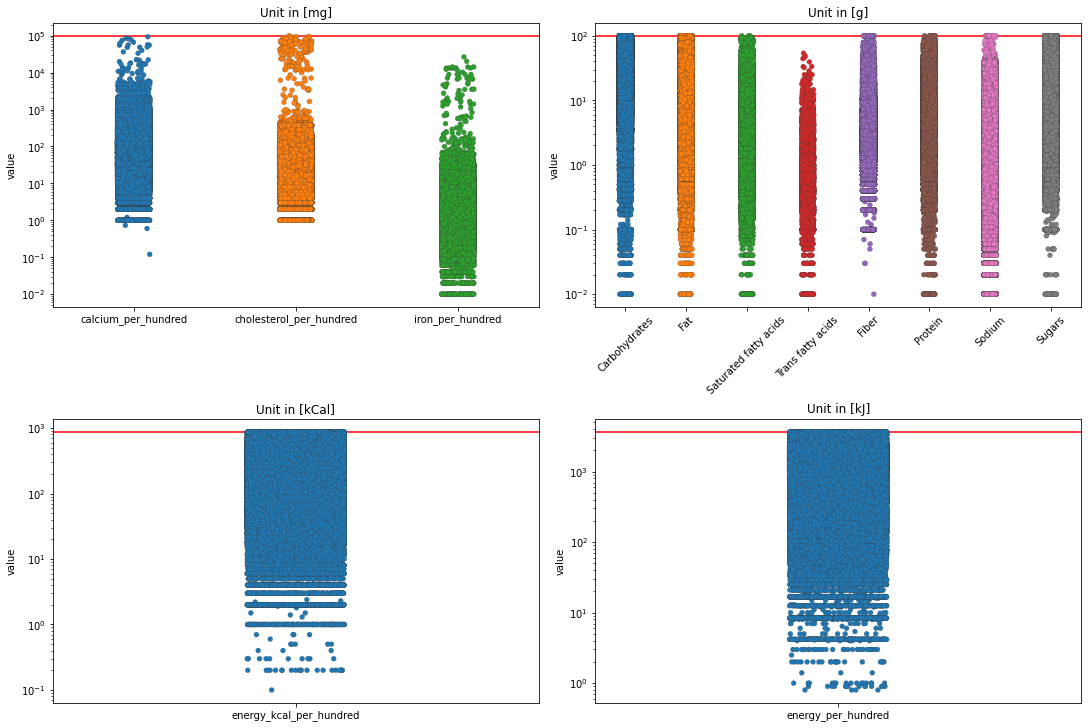

In [41]:
# Generate the attributes of the subplot figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)
# x = df[summary[summary["Unit"] == "mg"]["Finding name"]]
sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "mg"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[0, 0],
)
axes[0, 0].axhline(summary[summary["Unit"] == "mg"]["Maximum"][0], color="red")
axes[0, 0].set_title("Unit in [mg]")
axes[0, 0].set_xlabel("")
axes[0, 0].set_yscale("log")


sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "g"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[0, 1],
)
axes[0, 1].axhline(summary[summary["Unit"] == "g"]["Maximum"][0], color="red")
axes[0, 1].set_title("Unit in [g]")
axes[0, 1].set_xlabel("")
axes[0, 1].set_yscale("log")
axes[0, 1].set_xticklabels(xlabels)
axes[0, 1].xaxis.set_tick_params(rotation=45)

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "kCal"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[1, 0],
)
axes[1, 0].axhline(summary[summary["Unit"] == "kCal"]["Maximum"][0], color="red")
axes[1, 0].set_title("Unit in [kCal]")
axes[1, 0].set_xlabel("")
axes[1, 0].set_yscale("log")

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df[summary[summary["Unit"] == "kJ"]["Finding name"]]),
    linewidth=0.2,
    ax=axes[1, 1],
)
axes[1, 1].axhline(summary[summary["Unit"] == "kJ"]["Maximum"][0], color="red")
axes[1, 1].set_title("Unit in [kJ]")
axes[1, 1].set_xlabel("")
axes[1, 1].set_yscale("log")

We may see that the outliers over the red lines were removed. It is important to highlight that the plots were made using the DF information for making sure that the changes were made in the original DataFrame

In [42]:
# Using the following commmand the required information is computed
df.describe().loc[["mean", "min", "max"]].T

,mean,min,max
alcohol_by_volume,0.028058,0.0,57.90
calcium_per_hundred,97.949266,0.0,93750.00
carbohydrates_per_hundred,33.326990,0.0,100.00
cholesterol_per_hundred,42.628137,0.0,100000.00
energy_kcal_per_hundred,267.862014,0.0,884.00
energy_per_hundred,1120.567103,0.0,3700.00
fat_per_hundred,12.462396,0.0,100.00
fatty_acids_total_saturated_per_hundred,4.847821,0.0,100.00
fatty_acids_total_trans_per_hundred,0.031784,0.0,53.57
fiber_per_hundred,2.883388,0.0,100.00


**Observations** In the present section a detection and removal of the main outliers contained among the per hundred columns were removed from the complete database. For accomplishing this, the units for every attribute contained in a per hundred column were first found. With this, the per hundred columns were grouped by unit, and the suggested threshold was applied in every subgroup. With the plots we may see the difference between the data dispersion before and after the data drop is made. Finally, if we check the central dispersion values we see that the mean has reduced its distance from the maximum value. Still, more inconsistencies will be accounted in the following tasks.

#### B7. Do you spot any other inconsistencies in the data? What about the sum of a product’s protein, fat, carbohydrates, salt, and fiber content?

The column that provides the numerical information that is going to be included in a new column named sum, indicates the total amount of each nutrient considering a total base of 100 [g]. As every single element in the sum is also in units of [g], we know that the sum of these elements may not surpass the value 100. We will therefore, investigate the histogram and boxplot that summarize the information. 

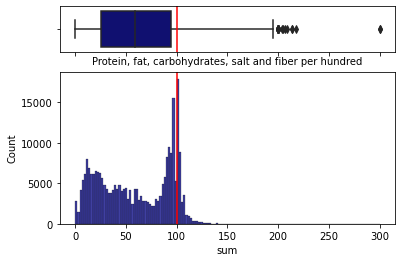

In [43]:
## Create a new column that contains the sum of these three elements
df["sum"] = (
    df["protein_per_hundred"]
    + df["fat_per_hundred"]
    + df["carbohydrates_per_hundred"]
    + df["sodium_per_hundred"]
    + df["fiber_per_hundred"]
)
# Ask for the main statistical relationships
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (3, 10)}
)

# assigning a graph to each ax
sns.boxplot(x=df["sum"], ax=ax_box, color="navy")
sns.histplot(data=df, x="sum", ax=ax_hist, color="navy")
ax_box.axvline(100, color="red")
ax_hist.axvline(100, color="red")

# Remove x axis name for the boxplot
ax_box.set(xlabel="Protein, fat, carbohydrates, salt and fiber per hundred")
plt.show()
# plot the corresponding dispersion
# plot the pairplot of these columns

We see that there are several datapoints in the sum column that surpass the value 100. We will now eliminate this points using the same strategy that we used before.

In [44]:
filter_sum = df["sum"] > 100
df_keep = df.loc[filter_sum, "sum"]
df = df.drop(df_keep.index, axis=0)

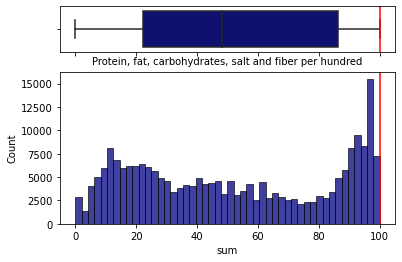

In [45]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (3, 10)}
)

# assigning a graph to each ax
sns.boxplot(x=df["sum"], ax=ax_box, color="navy")
sns.histplot(data=df, x="sum", ax=ax_hist, color="navy")
ax_box.axvline(100, color="red")
ax_hist.axvline(100, color="red")

# Remove x axis name for the boxplot
ax_box.set(xlabel="Protein, fat, carbohydrates, salt and fiber per hundred")
plt.show()
# plot the corresponding dispersion
# plot the pairplot of these columns

**Observations** As we mentioned before, the elements contained in the per hundred columns may not sum up more than 100 [g]. In this section we sum up this elements, and eliminate those rows were the sum surpasses the value 100 [g]. 

#### B8.  Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers.

We will start the exercise by checking the interquartile range of the _per_hundred values that are contained in the DF. For doing this we will use the boxplot filter that we checked in this lesson

In [46]:
Q1 = np.percentile(df.select_dtypes(include=np.number), 25, axis=0)
Q3 = np.percentile(df.select_dtypes(include=np.number), 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

The number of unique values in categorical variables has already been computed and corresponds to:

In [47]:
boxplot_filter = (df.select_dtypes(include=np.number) < lower_bound) | (
    df.select_dtypes(include=np.number) > upper_bound
)
print("Number of outliers detected per feature using a boxplot:")
print(boxplot_filter.sum(axis=0))
print("Total number of outliers detected:", boxplot_filter.sum(axis=0).sum())

Number of outliers detected per feature using a boxplot:
alcohol_by_volume                            826
calcium_per_hundred                            0
carbohydrates_per_hundred                      0
cholesterol_per_hundred                        0
energy_kcal_per_hundred                        0
energy_per_hundred                             0
fat_per_hundred                                0
fatty_acids_total_saturated_per_hundred        0
fatty_acids_total_trans_per_hundred            0
fiber_per_hundred                              0
id                                             0
iron_per_hundred                               0
portion_quantity                           11793
protein_per_hundred                            0
quantity                                   26629
sodium_per_hundred                             0
sugars_per_hundred                             0
sum                                            0
dtype: int64
Total number of outliers detected: 39248


No per hundred values seem to have any outliers using interquartiles and the boxplot filter. Hence, we will check again at the histograms for the numeric values. We are particularly interested in those attributes that have a unique column that concentrates most of the information

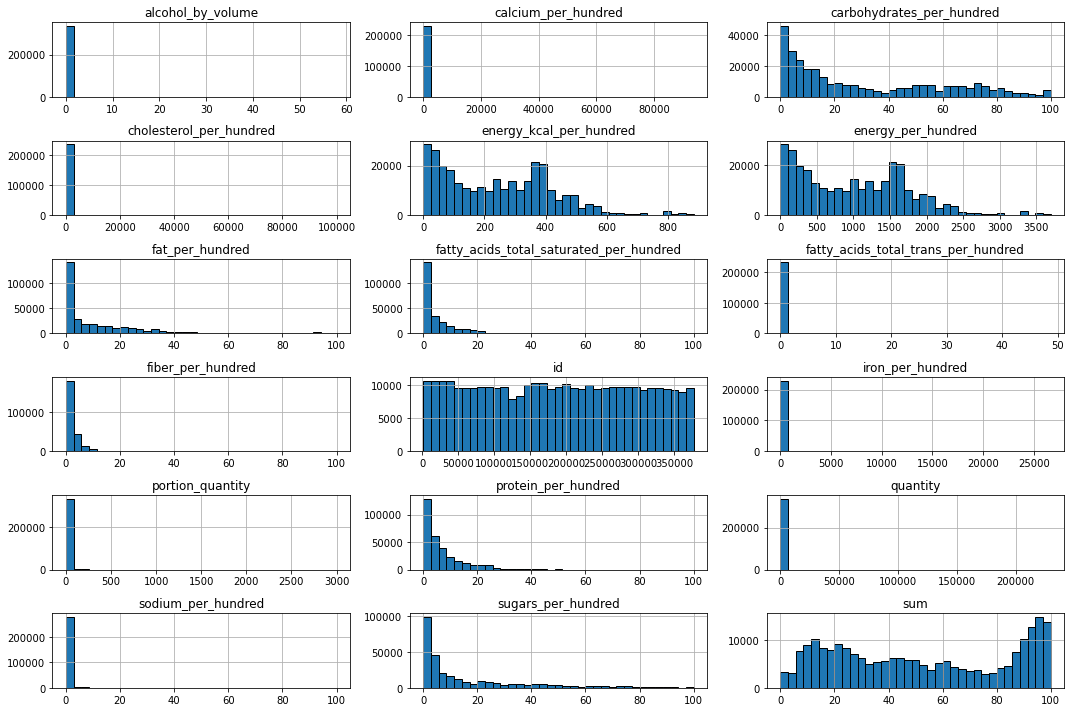

In [48]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=35, figsize=(15, 10), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

While it could be interesting to mention that most of the numerical information presents a clear positive skweness, we will have a further look into the attributes that mostly contain information of a single category: calcium, cholesterol, fatty acids total trans, iron, and sodium.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

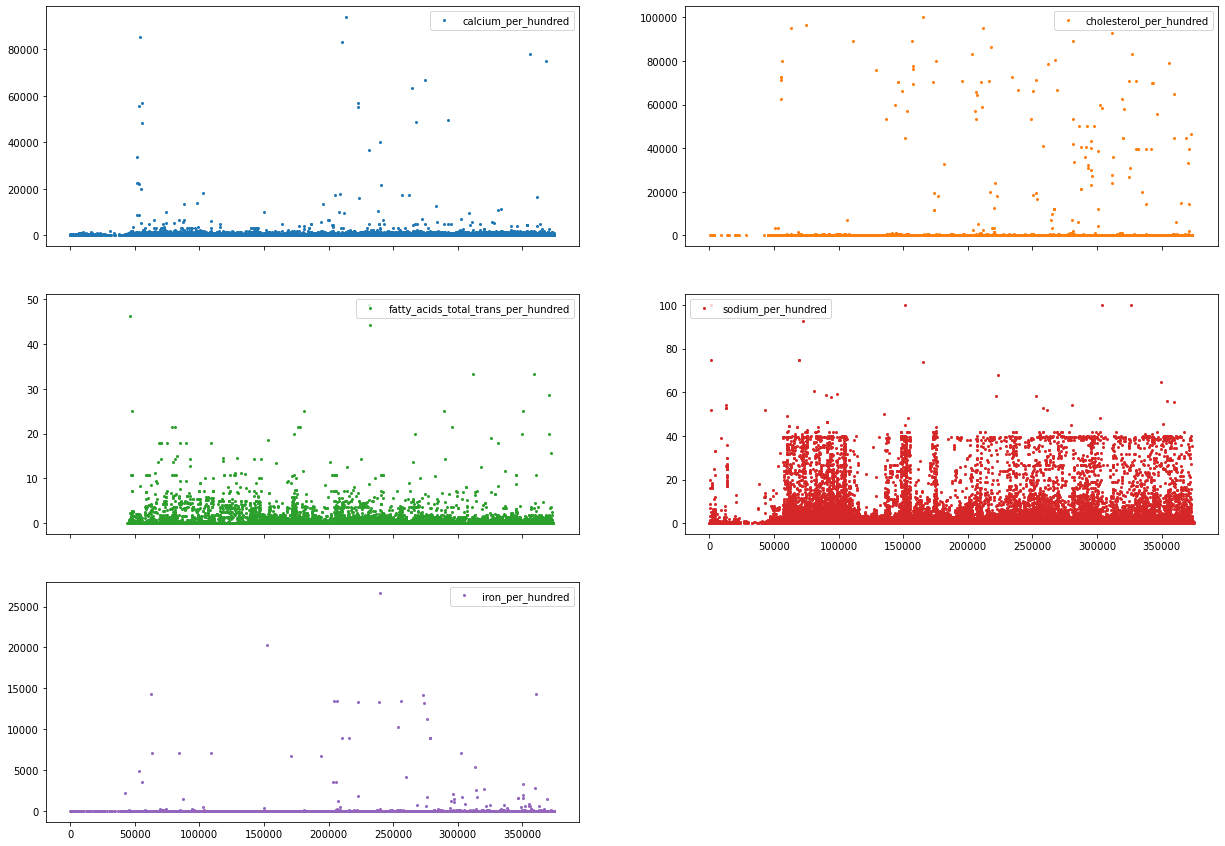

In [49]:
# Show histogram of particular features
df[
    [
        "calcium_per_hundred",
        "cholesterol_per_hundred",
        "fatty_acids_total_trans_per_hundred",
        "sodium_per_hundred",
        "iron_per_hundred",
    ]
].plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(21, 15), markersize=4)

The following decision responds to the idea that although all of the data points in these attributes are contained within less than three times the standard deviation of each sample, the following may be assumed. There are a small amount of points that present a huge deviation in comparison to the main data. As, this points distort the samples' means and standard deviations they will be removed from the dataset. The following values correspond to the selected thresholds:
* the calcium will be accepted up to a value of **7500** [mg]
* the cholesterol will be accepted up to a value of **2500** [mg]
* the fatty acids total trans will be accepted up to a value of **10** [g]
* the sodium will be acceptedd up to a value of **42** [g]
* the iron will be accepted up to a value of **100** [mg]

Note: the thresholds were selected after a couple iterations over the plots of dispersion and histograms

Text(0.5, 1.0, 'Alcohol')

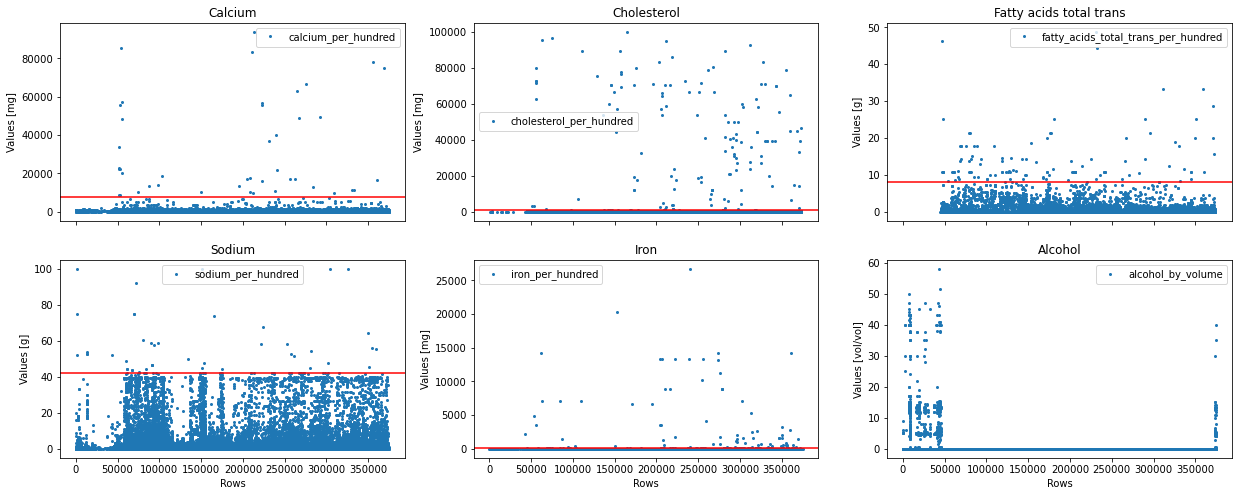

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(21, 8), sharex=True)

df[["calcium_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[0, 0],
)
axes[0, 0].axhline(7500, color="red")

df[["cholesterol_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[0, 1],
)
axes[0, 1].axhline(1000, color="red")

df[["fatty_acids_total_trans_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[0, 2],
)
axes[0, 2].axhline(8, color="red")

df[["sodium_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[1, 0],
)
axes[1, 0].axhline(42, color="red")

df[["iron_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[1, 1],
)
axes[1, 1].axhline(100, color="red")

df[["alcohol_by_volume"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[1, 2],
)

axes[0, 0].set_ylabel("Values [mg]")
axes[0, 1].set_ylabel("Values [mg]")
axes[0, 2].set_ylabel("Values [g]")
axes[1, 0].set_ylabel("Values [g]")
axes[1, 1].set_ylabel("Values [mg]")
axes[1, 2].set_ylabel("Values [vol/vol]")

axes[0, 0].set_xlabel("Rows")
axes[0, 1].set_xlabel("Rows")
axes[0, 2].set_xlabel("Rows")
axes[1, 0].set_xlabel("Rows")
axes[1, 1].set_xlabel("Rows")
axes[1, 2].set_xlabel("Rows")

axes[0, 0].set_title("Calcium")
axes[0, 1].set_title("Cholesterol")
axes[0, 2].set_title("Fatty acids total trans")
axes[1, 0].set_title("Sodium")
axes[1, 1].set_title("Iron")
axes[1, 2].set_title("Alcohol")

We will now drop the information that is over the red lines that have been plotted for each attribute

In [51]:
print(
    "The original shape of the DataFrame before selecting this outliers was "
    + str(df.shape)
)
filter_calcium = df["calcium_per_hundred"] > 7500
df_keep = df.loc[filter_calcium, "calcium_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the calcium outliers the new shape is " + str(df.shape))

filter_cholesterol = df["cholesterol_per_hundred"] > 1000
df_keep = df.loc[filter_cholesterol, "cholesterol_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the cholesterol outliers the new shape is " + str(df.shape))

filter_fatty_acids_total_trans = df["fatty_acids_total_trans_per_hundred"] > 8
df_keep = df.loc[filter_fatty_acids_total_trans, "fatty_acids_total_trans_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print(
    "After eliminating the fatty acid total trans outliers the new shape is "
    + str(df.shape)
)
filter_sodium = df["sodium_per_hundred"] > 42
df_keep = df.loc[filter_sodium, "sodium_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the sodium outliers the new shape is " + str(df.shape))

filter_iron = df["iron_per_hundred"] > 100
df_keep = df.loc[filter_iron, "iron_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the iron outliers the new shape is " + str(df.shape))

The original shape of the DataFrame before selecting this outliers was (337015, 64)
After eliminating the calcium outliers the new shape is (336972, 64)
After eliminating the cholesterol outliers the new shape is (336835, 64)
After eliminating the fatty acid total trans outliers the new shape is (336714, 64)
After eliminating the sodium outliers the new shape is (336668, 64)
After eliminating the iron outliers the new shape is (336576, 64)


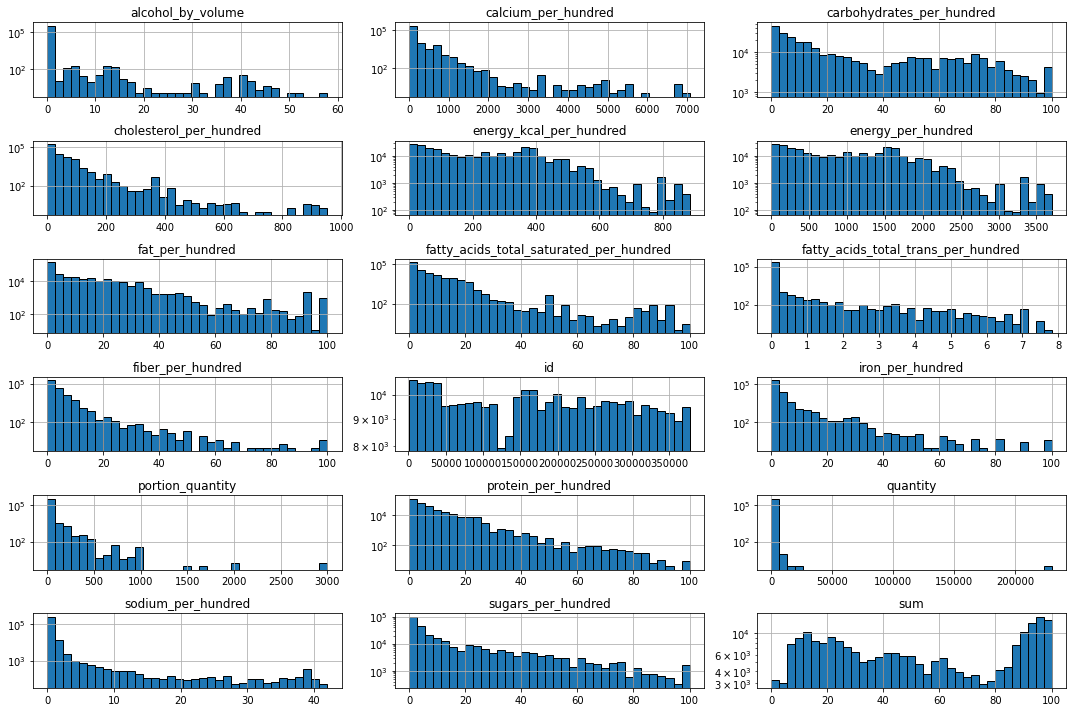

In [52]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=35, figsize=(15, 10), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

**Observations:** In this section, some extra outliers points were selected for those attributes that presented a single columned histogram. In the last plot the histograms for calcium, cholesterol, fatty acid total trans, sodium and iron are fuller than the previous plots as their range was reduced through the extraction of the outliers. 

##### [Return to the table of contents](#Table)

<a id="Indepth"></a>
### **C. In-depth Exploratory Data Analysis**

#### C1. What is the nutrients’ distribution per country? You can choose any subset of the nutrients you want to analyze (e.g. macronutrients, minerals, or vitamins).

We will now take a look at the distribution of some nutrients per country. For this analysis, we will include the main macronutrients: (1) carbohydrates, (2) fat, (3) protein, (4) fiber and (5) sugars. We will also include (6) alcohol for taking a look at the drinking habits of the countries. 

In [53]:
df.groupby("country")[list(df.select_dtypes(include=np.number))].count()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_per_hundred,id,iron_per_hundred,portion_quantity,protein_per_hundred,quantity,sodium_per_hundred,sugars_per_hundred,sum
country,,,,,,,,,,,,,,,,,,
CH,33028,555,22249,17,22460,22461,22211,0,0,14484,33028,205,33028,22103,33028,1047,20339,849
DE,10636,12,982,0,985,986,977,0,0,363,10636,9,10636,974,10636,3,985,2
FR,117,2,52,0,53,53,51,0,0,29,117,1,117,52,117,0,48,0
IT,2719,6,269,0,278,277,267,0,0,180,2719,8,2719,268,2719,0,270,0
US,290076,229078,286834,235022,278091,278092,284178,242316,233904,232365,290076,228663,290076,288886,290076,284992,271016,227868


The chosen macronutrients respond to the amount of information available per country, and shown in the table above. In the following lines we will make a comparison between the distribution of macronutrients per country

Text(0, 0.5, 'Values')

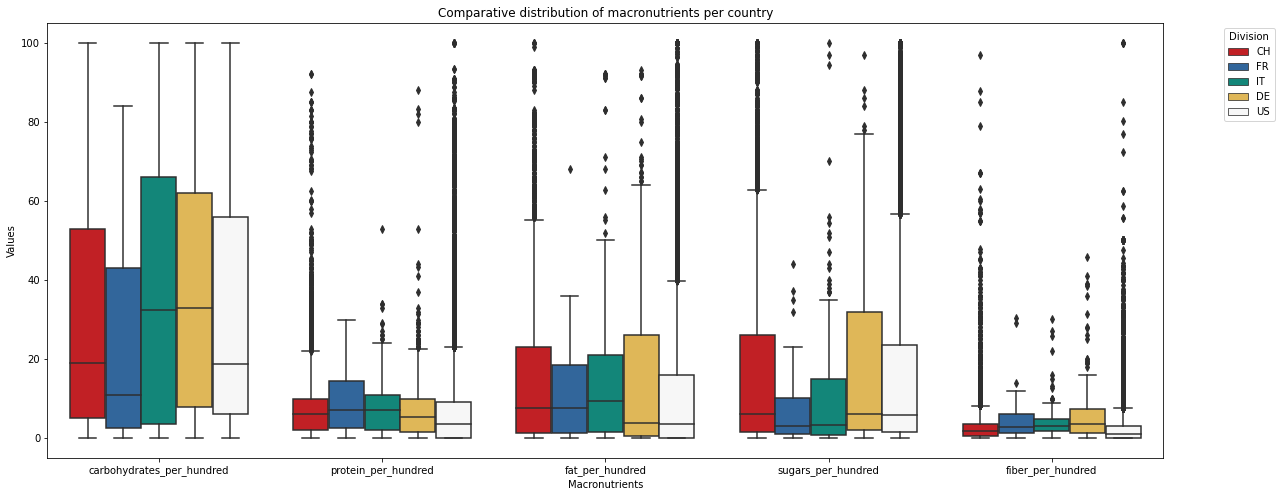

In [54]:
# Inclusion of stripplot for investigating cause of such a small mean value

df_melted = df[
    [
        "carbohydrates_per_hundred",
        "sugars_per_hundred",
        "protein_per_hundred",
        "fiber_per_hundred",
        "fat_per_hundred",
        "country",
    ]
]

df_melted.set_index("country", inplace=True)
dfl = (
    df_melted.stack()
    .reset_index()
    .rename(columns={"level_1": "_per_hundred", 0: "val"})
)

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))

# plot
plt.figure(figsize=(20, 8))
sns.boxplot(x="_per_hundred", y="val", data=dfl, hue="country")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Comparative distribution of macronutrients per country")
plt.xlabel("Macronutrients")
plt.ylabel("Values")

**Observations** The intake of carbohydrates is higher in Italy and Germany. On the other hand, France seems to have the smallest intake of this same nutrient in comparison to the rest. Yet we must not forget that France is the country with the smallest amount of observations. Whilst the protein, fat and fiber consumption are similar amongst the countries, Switzerland and Germany present a higher intake of sugars (not in mean but in their superior quartile). Finally, we must say that Switzerland and USA present much more outlier values than the rest of the countries, as they are the ones that contain much more input information than the rest in every macronutrient.

If we want to have any interesting information regarding alcohol consumption, we will first drop the values that are 0. This must be done as most of the consumed food products do not contain alcohol. Therefore, if we maintained this information the histograms of consumption would just look as a big column in zero (as it may be seen in the previous numeric plots)

Text(0.5, 1.0, 'Alcohol consumption per country')

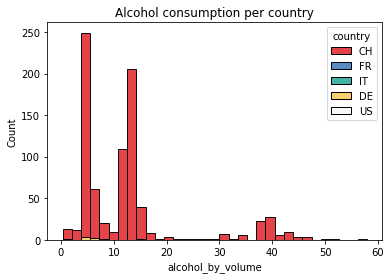

In [55]:
# Inclusion of stripplot for investigating cause of such a small mean value
# We will first remove the zero values from alcohol
df["alcohol_by_volume"] = df["alcohol_by_volume"].replace(0, np.NaN)

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))
# plot
sns.histplot(
    data=df,
    x="alcohol_by_volume",
    hue="country",
    multiple="stack",
)
plt.title("Alcohol consumption per country")

**Observations** Only Switzerland has enough information about alcoholic consumption as to identify a pattern. Still, it may be said that most of the entries correspond to fermentated drinks. The first peak may correspond mainly to beer which usually moves between 4° and 7° of alcohol. The second peak, is surely wine and ciders. Finally, destilated alcohols conform the last peak and we note that has a much lower frequency than the first two options.

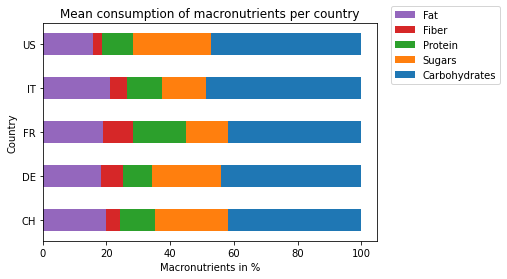

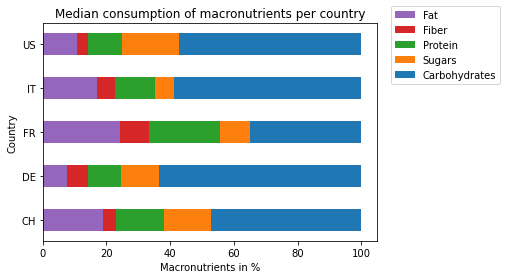

In [56]:
sns.set_palette(sns.color_palette("tab10"))
carbohydrates = df.groupby("country")["carbohydrates_per_hundred"].mean()
sugars = df.groupby("country")["sugars_per_hundred"].mean()
protein = df.groupby("country")["protein_per_hundred"].mean()
fiber = df.groupby("country")["fiber_per_hundred"].mean()
fat = df.groupby("country")["fat_per_hundred"].mean()

macronutrients = carbohydrates + sugars + protein + fiber + fat

carbohydrates = 100 * (carbohydrates / macronutrients)
sugars = 100 * (sugars / macronutrients)
protein = 100 * (protein / macronutrients)
fiber = 100 * (fiber / macronutrients)
fat = 100 * (fat / macronutrients)


b1 = plt.barh(
    macronutrients.index,
    carbohydrates,
    left=sugars + protein + fiber + fat,
    height=0.5,
)

b2 = plt.barh(
    macronutrients.index,
    sugars,
    left=protein + fiber + fat,
    height=0.5,
)

b3 = plt.barh(macronutrients.index, protein, left=fiber + fat, height=0.5)

b4 = plt.barh(macronutrients.index, fiber, left=fat, height=0.5)

b5 = plt.barh(macronutrients.index, fat, height=0.5)

plt.legend(
    [b5, b4, b3, b2, b1],
    [
        "Fat",
        "Fiber",
        "Protein",
        "Sugars",
        "Carbohydrates",
    ],
    loc=(1.04, 0.72),
)

plt.title("Mean consumption of macronutrients per country")
plt.ylabel("Country")
plt.xlabel("Macronutrients in %")
plt.show()

carbohydrates = df.groupby("country")["carbohydrates_per_hundred"].median()
sugars = df.groupby("country")["sugars_per_hundred"].median()
protein = df.groupby("country")["protein_per_hundred"].median()
fiber = df.groupby("country")["fiber_per_hundred"].median()
fat = df.groupby("country")["fat_per_hundred"].median()

macronutrients = carbohydrates + sugars + protein + fiber + fat

carbohydrates = 100 * (carbohydrates / macronutrients)
sugars = 100 * (sugars / macronutrients)
protein = 100 * (protein / macronutrients)
fiber = 100 * (fiber / macronutrients)
fat = 100 * (fat / macronutrients)

b1 = plt.barh(
    macronutrients.index,
    carbohydrates,
    left=sugars + protein + fiber + fat,
    height=0.5,
)

b2 = plt.barh(
    macronutrients.index,
    sugars,
    left=protein + fiber + fat,
    height=0.5,
)

b3 = plt.barh(macronutrients.index, protein, left=fiber + fat, height=0.5)

b4 = plt.barh(macronutrients.index, fiber, left=fat, height=0.5)

b5 = plt.barh(macronutrients.index, fat, height=0.5)

plt.legend(
    [b5, b4, b3, b2, b1],
    [
        "Fat",
        "Fiber",
        "Protein",
        "Sugars",
        "Carbohydrates",
    ],
    loc=(1.04, 0.72),
)

plt.title("Median consumption of macronutrients per country")
plt.ylabel("Country")
plt.xlabel("Macronutrients in %")
plt.show()

**Observations** We take a look at the consumption of macronutrients per country considering the mean and median. It is possible to obtain better information from the median, because as we have said before, the numerical data is mainly skewed. If we take a look at the mean we will see that: (1) The mean consumption of fat, protein and carbohydrates is similar in all of the countries; (2) France has a higher mean intake of protein and (3) France and Italy have a lower mean consumption of sugars than the rest of the countries. 

On the other hand, if we take a look to the median we may see that: (1) The consumption of fiber is similar amongst the countries; (2) France consumes more protein, more fat and less carbohydrates than the rest of the countries; (3) Germany and USA have a higher intake of carbohydrates and (4) The USA and Switzerland have a higher intake of sugars. 

#### C2. Your goal is to analyze organic vs. non-organic products distribution in the Open Food database. Look for terms such as “bio” and “organic” in the product names.
* **Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?**

For giving answer to the first question:

In [57]:
df["organic"] = df["product_name_en"].str.contains("bio|organic", na=False)
df_bio = df[df["product_name_en"].str.contains("bio|organic", na=False)]
df_notbio = df[~df["product_name_en"].str.contains("bio|organic", na=False)]

In [58]:
df["organic"].sum()
df = df.replace({"organic": {True: "organic", False: "non-organic"}})

In [59]:
# The organic and non organic products per country
df.groupby("country")["organic"].value_counts()

country  organic    
CH       non-organic     32885
         organic           143
DE       non-organic     10626
         organic            10
FR       non-organic       117
IT       non-organic      2714
         organic             5
US       non-organic    290062
         organic            14
Name: organic, dtype: int64

Text(0.5, 1.0, 'Non-Organic products by country')

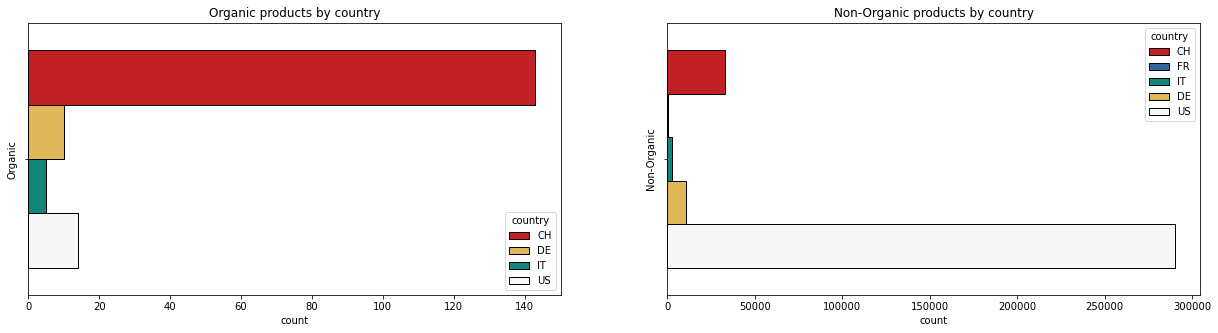

In [60]:
# Create an array with the colors you want to use
colors = ["#DC050C", "#F6C041", "#009988", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 2, figsize=(21, 5))
sns.countplot(
    y="organic", hue="country", data=df_bio, ax=axes[0], linewidth=1, edgecolor="black"
)
axes[0].set_ylabel("Organic")
axes[0].set_yticklabels([""])  # remove the ticks
axes[0].set_title("Organic products by country")

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))

sns.countplot(
    y="organic",
    hue="country",
    data=df_notbio,
    ax=axes[1],
    linewidth=1,
    edgecolor="black",
)
axes[1].set_ylabel("Non-Organic")
axes[1].set_yticklabels([""])  # remove the ticks
axes[1].set_title("Non-Organic products by country")

**Observations** We see that there is a big difference between the number (count) of organic and non organic products. Yet, the country that has by far a largest amount of organic entries is Switzerland. The USA leads the number of non-organic entries. But, we must not forget that it is also the country that contains a largest amount of entries in the DF. France contains such a small amount of entries that its contribution is not visible in the Non-Organic plot. No French products were found in the organic entries.

* **Is there a difference in the nutrients’ distribution between organic and non-organic products in each country?**

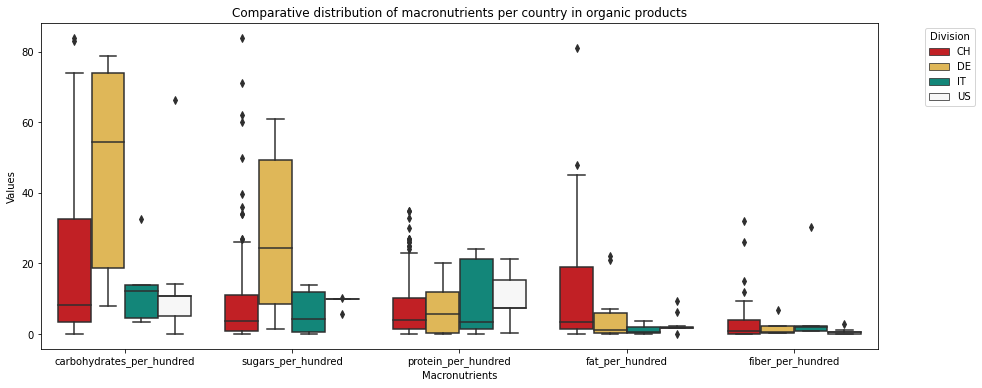

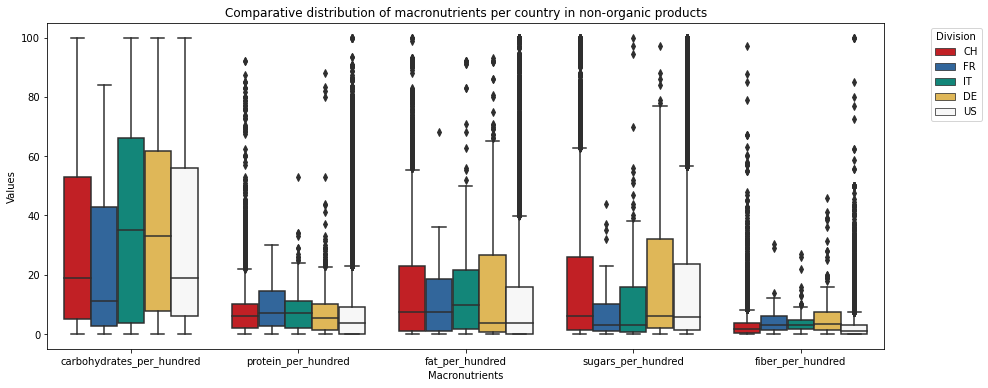

In [61]:
df_melted = df_bio[
    [
        "carbohydrates_per_hundred",
        "sugars_per_hundred",
        "protein_per_hundred",
        "fiber_per_hundred",
        "fat_per_hundred",
        "country",
    ]
]

df_melted.set_index("country", inplace=True)
dfl = (
    df_melted.stack()
    .reset_index()
    .rename(columns={"level_1": "_per_hundred", 0: "val"})
)

# Create an array with the colors you want to use
colors = ["#DC050C", "#F6C041", "#009988", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plot
plt.figure(figsize=(15, 6))
sns.boxplot(x="_per_hundred", y="val", data=dfl, hue="country")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Comparative distribution of macronutrients per country in organic products")
plt.xlabel("Macronutrients")
plt.ylabel("Values")
plt.show()


df_melted = df_notbio[
    [
        "carbohydrates_per_hundred",
        "sugars_per_hundred",
        "protein_per_hundred",
        "fiber_per_hundred",
        "fat_per_hundred",
        "country",
    ]
]

df_melted.set_index("country", inplace=True)
dfl = (
    df_melted.stack()
    .reset_index()
    .rename(columns={"level_1": "_per_hundred", 0: "val"})
)

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))

# plot
plt.figure(figsize=(15, 6))
sns.boxplot(x="_per_hundred", y="val", data=dfl, hue="country")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title(
    "Comparative distribution of macronutrients per country in non-organic products"
)
plt.xlabel("Macronutrients")
plt.ylabel("Values")
plt.show()

**Observations** Visible differences are appreciated for the carbohydrates and sugars in Germany, which seem larger in organic food in comparison to non-organic. But the number of observations for this country were small in comparison to Switzerland. If we take a look at Switzerland we will see that no relevant changes are encountered in fat, fiber or protein. For carbohydrates and sugars a decrease is found in the organic products.

##### [Return to the table of contents](#Table)

<a id="Text"></a>
### **D. Text data**

The essential methods and skills for data analysis can vary from one data type to another. For instance, text data requires different manipulation techniques than numerical data. One example of text data in the Open Food database is available in the ingredients_en column. In this task, you will work with the ingredients_en column; your goal is to preprocess the text data in this column and answer the following questions.
* Be careful with text normalization:

punctuation, e.g., “water.” vs. “water”
capitalization, e.g., “water” vs. “Water”
white spaces removal, e.g., “ water” vs. “water”
special characters, e.g. “raw beef [soja sauce (with ble), …]”

In [62]:
print("Data shape: ", df.shape)

# Check for missing values in the column of ingredients

df.dropna(subset=["ingredients_en"], inplace=True)

Data shape:  (336576, 65)


In [63]:
# Obtain new data shape
print("Data shape: ", df.shape)

Data shape:  (297875, 65)


In [64]:
# Display a random sample of an ingredient row
pd.set_option("display.max_colwidth", 500)
df["ingredients_en"].sample(3)

337203    ENRICHED FLOUR (WHEAT FLOUR, MALTED BARLEY FLOUR, NIACIN, FERROUS SULFATE, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID), WATER, COOKED PIZZA TOPPING (SAUSAGE MADE WITH PORK AND CHICKEN [PORK, MECHANICALLY SEPARATED CHICKEN, WATER, SEASONING {SPICES, CORN SYRUP SOLIDS, SALT, DRY GARLIC, CHILI PEPPER, CARAMEL COLOR}, CARAMEL COLOR], WATER, TEXTURED VEGETABLE PROTEIN [SOY PROTEIN CONCENTRATE, CARAMEL COLOR]), TOMATO PASTE (TOMATOES), IMITATION MOZZARELLA CHEESE (WATER, PALM OIL, CASEIN [MILK P...
107462                                                      POPCORN, BROWN SUGAR, VEGETABLE OIL (CONTAINS ONE OR MORE OF THE FOLLOWING: CANOLA OIL, CORN OIL, SOYBEAN OIL), CORN SYRUP, CHEESE SEASONING (COCONUT OIL, MALTODEXTRIN, WHEY, SALT, BUTTERMILK, CHEDDAR CHEESE [PASTEURIZED MILK, CHEESE CULTURES, SALT, ENZYMES], NATURAL FLAVOR, SODIUM PHOSPHATE, SODIUM CITRATE, ARTIFICIAL COLORS [YELLOW 5, YELLOW 6], AUTOLYZED YEAST EXTRACT), BUTTER (PASTEURIZED CREAM, SALT), SALT, SOY LECITHIN, 

In [65]:
# Count the number of word in the first cell of ingredients
len(df["ingredients_en"][0].split())

17

In [66]:
# In the next cell, we use the apply function to count the number of words in the ingredients of each product
df["ingredients_en"].apply(lambda x: len(x.split())).sort_values(ascending=False)

51629     536
275300    485
350670    479
241595    475
241579    448
         ... 
11169       1
306385      1
149084      1
202725      1
306172      1
Name: ingredients_en, Length: 297875, dtype: int64

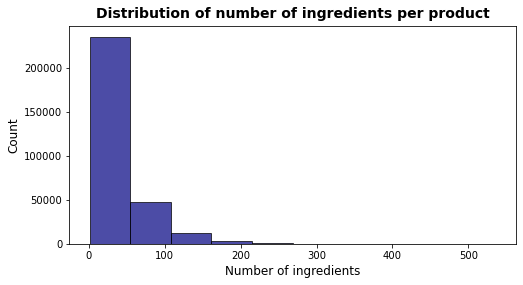

In [67]:
# Plot the number of words per ingredients in product

# Barplot and font specifications
barplot_specs = {"color": "navy", "alpha": 0.7, "edgecolor": "black"}
label_specs = {"fontsize": 12}
title_specs = {"fontsize": 14, "fontweight": "bold", "y": 1.01}

plt.figure(figsize=(8, 4))

plt.hist(df["ingredients_en"].apply(lambda x: len(x.split())), **barplot_specs)
plt.xlabel("Number of ingredients", **label_specs)
plt.ylabel("Count", **label_specs)
plt.title("Distribution of number of ingredients per product", **title_specs)
plt.show()

**Observations** Without making any modification of the string contained in the ingredients, most of the observations contain between 0 and 50 words.

In the following lines we will use part of the codes that we learned in this chapter for cleaning strings that need to be looked in attention. In the commments it may be found the utility of each step that was performed

In [68]:
import re

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

# Print stopwords

print("{} stopwords in NLTK's list.\n".format(len(stopwords_english)))
print(stopwords_english)

# append words evidenced in the iterative process of most common

# First 30 iterations
stopwords_english.append("natural")
stopwords_english.append("organic")
stopwords_english.append("flavor")
stopwords_english.append("powder")
stopwords_english.append("vitamin")
stopwords_english.append("juice")
stopwords_english.append("less")
stopwords_english.append("contains")
stopwords_english.append("artificial")
stopwords_english.append("2%")
stopwords_english.append("red")

# Second 30 iterations
stopwords_english.append("color")
stopwords_english.append("modified")
stopwords_english.append("concentrate")
stopwords_english.append("extract")
stopwords_english.append("flavors")
stopwords_english.append("folic")

# Third 30 iterations
stopwords_english.append("yellow")

print(stopwords_english)


def preprocess_text(text):

    """
    This function preprocesses raw samples of text:
    - Converts to lowercase
    - Replaces common punctuation marks with whitespace
    - Removes stop words
    - Splits text on whitespace

    INPUT:
    - text: "raw" text (string)

    OUTPUT:
    - processed_sample_tokens: list of tokens (list of strings)
    """

    # Convert to lowercase
    clean_text = text.lower()

    # Replace common punctuation marks with whitespace
    clean_text = re.sub(r"[,.()]", " ", clean_text)

    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s", " ", clean_text)

    # Remove stop words and split on whitespace
    processed_sample_tokens = [
        tok for tok in clean_text.split() if tok not in stopwords_english
    ]

    return processed_sample_tokens

179 stopwords in NLTK's list.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',

#### D1. * Which product has the shortest ingredients list? 

For making this we will process the information held in the column ingredients. After applying the cleaning function, the number of words contained in each row will be counted. With this the shortest and largest list of ingredients may be found.

In [69]:
# 2nd alternative (using the apply method)

df["clean_text"] = df["ingredients_en"].apply(lambda x: preprocess_text(x))

In [70]:
df["count_ingredients"] = (
    df["ingredients_en"].apply(lambda x: len(x.split())).sort_values(ascending=False)
)

In [71]:
df.sort_values(by="count_ingredients", ascending=False, inplace=True)

In [72]:
print(
    "The products with the shortest amount of ingredients are in total  "
    + str((df["count_ingredients"] == 1).sum())
    + ". Due to the large number, their names are contained in the list shortest_ingredients"
)
shortest_ingredients = df[(df["count_ingredients"] == 1)]["product_name_en"]

The products with the shortest amount of ingredients are in total  4583. Due to the large number, their names are contained in the list shortest_ingredients


#### D2. Which products have the longest ingredients list?

In [73]:
print(
    "The product with the longest amount of ingredients is "
    + str(df["product_name_en"][df["count_ingredients"].index[0]])
)

The product with the longest amount of ingredients is Gamesa Lonchera Assorted Cookies 14.3 Ounce 5 Pack Box


#### D3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.

For making this research the string contained in each row will be joined and afterwards, splitted and counted. It is important to highlight that only the 30 most commons ingredients will be computed

In [74]:
df["clean_text"] = df["clean_text"].astype("string")
from collections import Counter

most_common = Counter(" ".join(df["clean_text"]).split()).most_common(30)

In [75]:
df_common = pd.DataFrame(most_common, columns=["Ingredient", "Number of appearences"])
df_common = df_common.replace(",", "", regex=True)
df_common = df_common.replace("'", "", regex=True)
df_common

,Ingredient,Number of appearences
0,salt,298808
1,acid,203863
2,oil,202986
3,sugar,202969
4,water,184737
5,flour,174589
6,corn,157950
7,milk,153390
8,sodium,152960
9,wheat,124185


**Observations** This list of common ingredients was processed in 3 iterations. In every iteration, the words that were found not to be an ingredient, were appended to the list of stopwords. Hence, they were removed from the possible ingredients' list and a new searh was performed.

We will finally plot the 30 most common ingredients in a convenient way for presentation

Text(0.5, 1.0, '30 Most common ingredients')

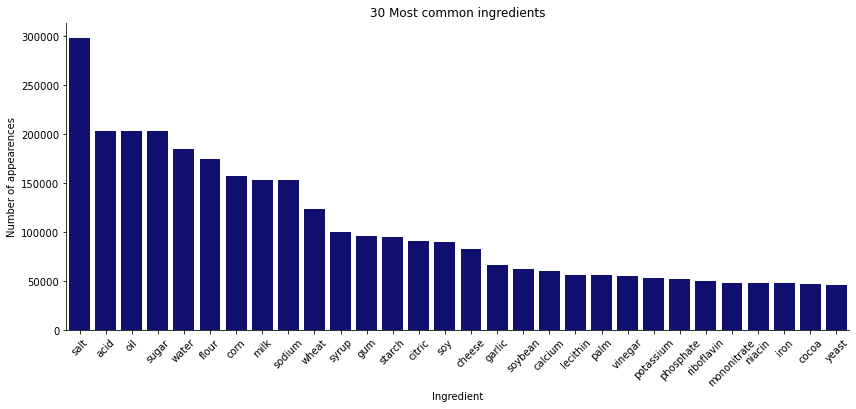

In [76]:
# Plot the most common ingredients found in the respective column after cleaning
g = sns.catplot(
    x="Ingredient",
    y="Number of appearences",
    data=df_common,
    kind="bar",
    height=5,
    aspect=12 / 5,
    color="navy",
)
g.set_xticklabels(rotation=45)
plt.title("30 Most common ingredients")

##### [Return to the table of contents](#Table)

<a id="Timeseries"></a>
### E. Time-series data


Another data type that requires specific methods and skills for analysis is time-series data. Although the Open Food database is not a time-series database, it contains several columns with dates and times, allowing for a simple investigation. In this task, you will work with the created_at column that stores the date and time at which products were added to the Open Food database. You will analyze the total number of products added to the database.**

#### E1. Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair.**

**Observations** For performing this task two new columns were created. These columns contain the hour and month of the introduction of a new input. With this, a new DF was created. It contains the hour in its columns and the months in its rows. the heatmap that was created contains the value count in its central values.

In [77]:
# convert column to datetime pandas
df["created_at"] = pd.to_datetime(df["created_at"])
df["date"] = pd.to_datetime(df["created_at"])

In [78]:
df["hour"] = pd.to_datetime(df["created_at"]).dt.hour

In [79]:
df["month"] = pd.to_datetime(df["created_at"]).dt.month

In [80]:
df_heatmap = (
    df.groupby("month")["hour"]
    .value_counts()
    .unstack("hour", fill_value=0)
    .reset_index()
)
df_heatmap.drop("month", axis=1, inplace=True)

Text(0.5, 1.0, 'Heatmap for counting the number of objects created')

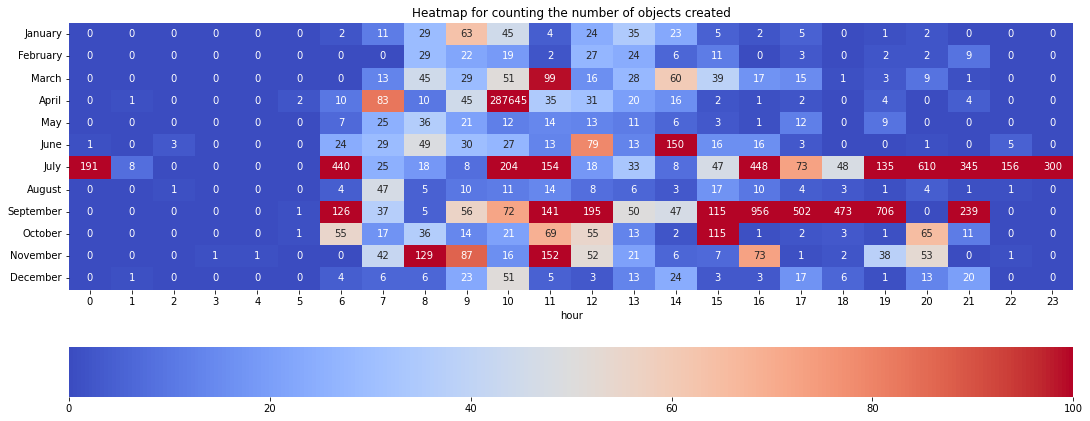

In [81]:
cols = (
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
)
f, ax = plt.subplots(figsize=(18, 7))
ax = sns.heatmap(
    df_heatmap,
    ax=ax,
    cbar_kws={"orientation": "horizontal"},
    vmin=0,
    vmax=100,
    annot=True,
    fmt="d",
    cmap="coolwarm",
)
ax.set_yticklabels(cols, rotation=0)
ax.set_title("Heatmap for counting the number of objects created")

**Observations:** The months of summer present a higher number of inputs than the months of winter. The months of July and September have inputs during later hours than the rest. There is an important outlier during the hour 10 of the month of April.

#### E2. Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the x-axis and the total number of items created during each month on the y-axis. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the y-axis.

In [82]:
# Analogously to the columns month and hour, we create a column that contains the month and year
df["month_year"] = df["date"].dt.to_period("M")
df.sort_values("month_year", ascending=False)
# groupby plot
df_plot = (
    df.groupby(["country", "month_year"])
    .size()
    .reset_index()
    .pivot(columns="country", index="month_year", values=0)
)

C:\Users\56975\anaconda3\envs\adsml\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Text(0, 0.5, 'Number of products')

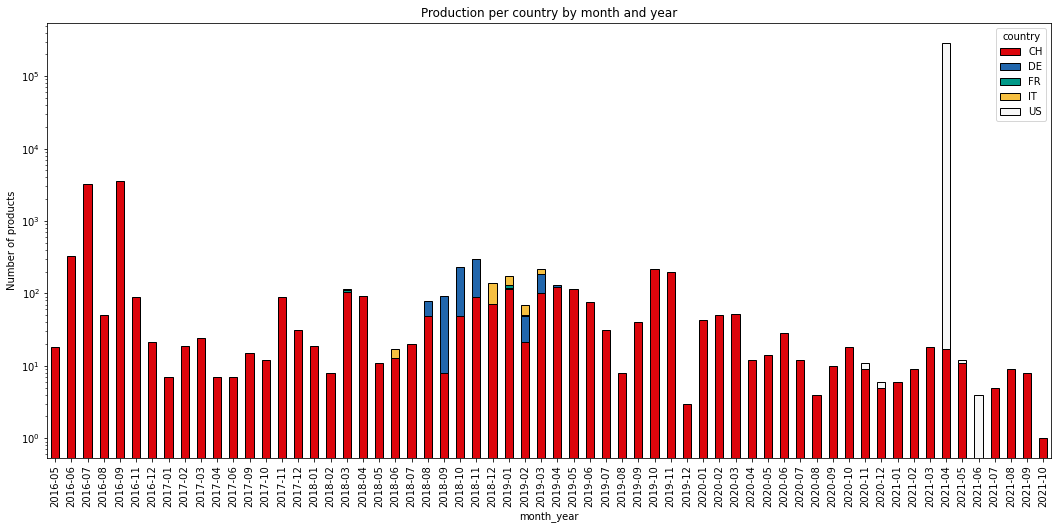

In [83]:
df_plot.plot(figsize=(18, 8), kind="bar", stacked=True, log=True, edgecolor="black")
# Just add a title and rotate the x-axis labels to be horizontal.
plt.title("Production per country by month and year")
plt.xticks(rotation=90, ha="center")
plt.ylabel("Number of products")

**Observations** (1) Most of the regular introduction of products correspond to Switzerland. (2) Between 2016 and 2019 there are more entries than between 2020 and 2021. (3) There is a big peak of information in the fourth month of 2021. This peak is likely to be the same one seen in the heatmap. (4) Most of the products that correspond to USA were introduced in the same month and year during the aforementioned peak. (5) For Germany, the information was all entered in a lapse of 1 year between 2018 and 2019.

<a id="Correlation"></a>
### F. Correlation analysis

Data analysis usually entails studying the strength of correlations in the data. This is important because studying correlations helps to set expectations on which machine learning models can better capture these correlations. A correlation analysis can be quantitative (e.g., based on standard correlation measures) or qualitative (e.g., based on visualizations). Also, methods of correlation analysis can vary from one data type to another. In this task, you will do quantitative and qualitative correlation analysis for some of the columns in the data.

#### F1. Your task is to quantify the linear relationships between the energy_per_hundred and other numerical variables. Use the per_hundred columns and find their correlations with energy_per_hundred.

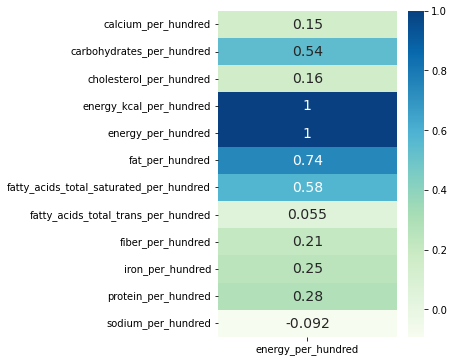

In [84]:
df_corr_impact_action_yn = df.filter(like="per_hundred").corr()["energy_per_hundred"][
    :-1
]
# set fig size
fig, ax = plt.subplots(figsize=(4, 6))
# plot matrix
sns.heatmap(
    df_corr_impact_action_yn.to_frame(), annot=True, annot_kws={"size": 14}, cmap="GnBu"
)
plt.show()

**Observations** (1) There is a high correlation between energy and energy kCal because one can be obtained by multiplying the other one by a factor. (2) It is interesting to see that the energy seems to be highly correlated with fat and fatty saturated acids. As fat is usually the macronutrient that has a higher caloric intake, this could explain the correlation between the variables. (3) Energy is poorly correlated with minerals and salts such as sodium and calcium. (4) There is a low correlation between energy and trans fatty acids.

#### F2. Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or seaborn pairplots.
* Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?

Text(0.5, 0.98, 'Low correlated per hundred variables')

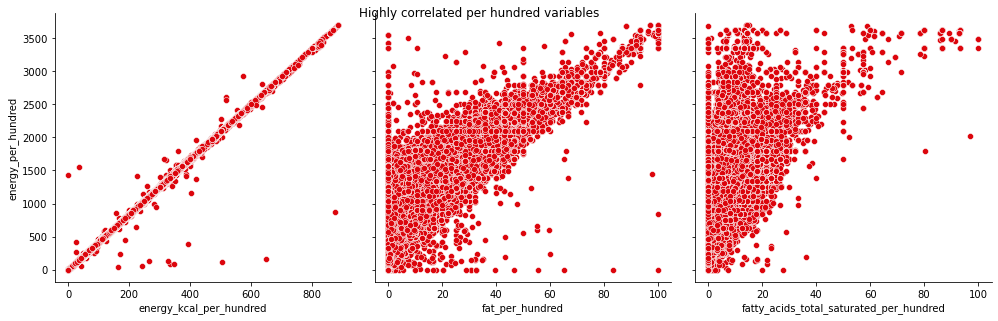

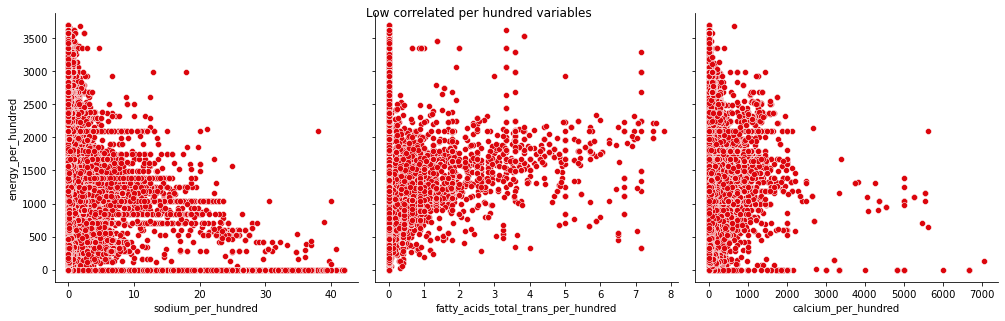

In [85]:
h = sns.pairplot(
    data=df,
    y_vars=["energy_per_hundred"],
    x_vars=[
        "energy_kcal_per_hundred",
        "fat_per_hundred",
        "fatty_acids_total_saturated_per_hundred",
    ],
)
h.fig.set_size_inches(15, 5)
h.fig.suptitle("Highly correlated per hundred variables")
# g.title("Highly correlated per_hundred attributes")

l = sns.pairplot(
    data=df,
    y_vars=["energy_per_hundred"],
    x_vars=[
        "sodium_per_hundred",
        "fatty_acids_total_trans_per_hundred",
        "calcium_per_hundred",
    ],
)
l.fig.set_size_inches(15, 5)
l.fig.suptitle("Low correlated per hundred variables")

**Observations** If we first take a look at the highly correlated per hundred variables we may see that: (1) As expected the linear relationship within energy and energy kCal is almost perfect as one may be obtained as a factor of the other one. (2) Fat present a linear clear correlation with energy, that may be explained due to the high caloric intake that fat has in comparison to other macronutrients (9kCal/g in fat v/s 4kCal/g in carbohydrates). (3) Finally, for fatty saturated acids the linear relationship is not as clear as for the first two highly correlated variables. This type of macronutrient are usually called the healthy fat, and it may be found in fish oil, eggs and milk.

If we now take a lok at the low correlated variables we see that: (1) for sodium and calcium no apparent correlation may be found (non linear, nor non-linear). (2) But, for trans fatty acids a relationship is clearly visible. Yet, it is not linear and this is the reason why this relationship was considered low by the correlation matrix. This correlation may exist, as trans fatty acids are mostly found in fried food and industrial production.

#### F3. Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable with three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced.

In [86]:
# Using the following commmand the required information is computed
df["energy_per_hundred"].describe()

count    284924.000000
mean       1004.354546
std         734.616378
min           0.000000
25%         322.170000
50%         983.240000
75%        1569.000000
max        3698.660000
Name: energy_per_hundred, dtype: float64

Energy per hundred presents a positive skewness in its distribution. The mean and median values are near, but we will use the quartils for separating the information between low, medium and high energy

In [87]:
df["energy_level"] = pd.qcut(
    df["energy_per_hundred"], q=[0, 0.25, 0.75, 1], labels=["Low", "Medium", "High"]
)

In [88]:
df["energy_level"].head(5)

51629        NaN
275300    Medium
350670    Medium
241595    Medium
241579    Medium
Name: energy_level, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Text(0.5, 0, 'Energy level')

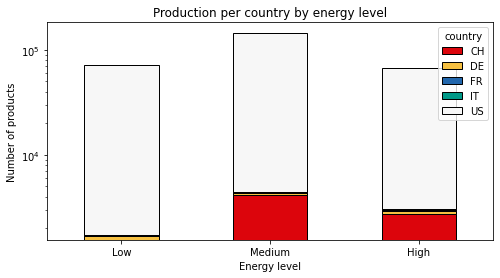

In [89]:
colors3 = ["#DC050C", "#F6C041", "#2166AC", "#009988", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors3))

df_plot = (
    df.groupby(["country", "energy_level"])
    .size()
    .reset_index()
    .pivot(columns="country", index="energy_level", values=0)
)
df_plot.plot(figsize=(8, 4), kind="bar", stacked=True, log=True, edgecolor="black")
# Just add a title and rotate the x-axis labels to be horizontal.
plt.title("Production per country by energy level")
plt.xticks(rotation=0, ha="center")
plt.ylabel("Number of products")
plt.xlabel("Energy level")

**Observations** Most of the information belongs to USA, as it is the country with a higher amount of inputs. the following points may be aknowledged: (1) Most products in USA and Switzerland contain a Medium energy level; (2) Switzerland's main products are in the medium energy level; almost no swiss products may be found in the low energy level. (3) USA presents the highest amount of products in the High level energy.
Regarding the statistical independence of two categorical variables, from the information of USA we can see that the proportion of low, medium and high energy contain a similar number of products. There is no information in the plot that may assign an energetic level product to a producer country.

##### [Return to the table of contents](#Table)